In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pd.set_option('max_rows', 5)
%matplotlib inline

## ロジスティック回帰
---
2 値変数 ( 2 種類の値をとる) を目的変数として、対応するカテゴリにそのデータが属する確率を推定する手法の 1 つ。

<table class="border text-center background-bright">
    <tr class="background-dark">
        <th></th>
        <th>$x$</th>
        <th>正解</th>
        <th class="border-right-double">$y$</th>
        <th>$\hat{y}$</th>
        <th>Aである確率</th>
        <th>Bである確率</th>
        <th>予測</th>
    </tr>
    <tr>
        <td>1</td>
        <td class="text-right">1.1</td>
        <td>A</td>
        <td class="border-right-double">1</td>
        <td>0.98</td>
        <td class="text-right">98%</td>
        <td class="text-right">2%</td>
        <td>A</td>
    </tr>
    <tr>
        <td>2</td>
        <td class="text-right">0.5</td>
        <td>B</td>
        <td class="border-right-double">0</td>
        <td>0.55</td>
        <td class="text-right">55%</td>
        <td class="text-right">45%</td>
        <td>A</td>
    </tr>
    <tr>
        <td colspan="8">$\vdots$</td>
    </tr>
    <tr>
        <td>n</td>
        <td class="text-right">-2.5</td>
        <td>B</td>
        <td class="border-right-double">0</td>
        <td>0.04</td>
        <td class="text-right">4%</td>
        <td class="text-right">96%</td>
        <td>B</td>
    </tr>
</table>



### ダミー変数
---
カテゴリ変数 (主に名義尺度) を 0 または 1 の値をとる 2 値変数に変換して数値計算可能にする手法。  
One-hot エンコーディングとも呼ぶ。

<table class="background-bright border text-center">
    <tr>
        <th class="background-default border-top-none border-left-none border-bottom" rowspan="2"></th>
        <th class="background-dark">カテゴリ変数</th>
        <td class="background-default border-top-none border-bottom-none" rowspan="2"></td>
        <th class="background-dark" colspan="3">ダミー変数</th>
    </tr>
    <tr class="background-dark border-bottom">
        <th>色</th>
        <th>赤</th>
        <th>緑</th>
        <th>青</th>
    </tr>
    <tr>
        <td>1</td>
        <td>赤</td>
        <td class="background-default border-top-none border-bottom-none" rowspan="3">→</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>2</td>
        <td>緑</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>3</td>
        <td>青</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

ダミー変数は 1 列削っても情報は失われない (その他の変数から削除された列の値がわかる) ので、特にカテゴリの水準 (カテゴリ数) が 2 つしかない場合には 1 列だけで表現することが多い。

<table class="background-bright border text-center">
    <tr>
        <th class="background-default border-top-none border-left-none border-bottom" rowspan="2"></th>
        <th class="background-dark">カテゴリ変数</th>
        <th class="background-default border-top-none border-bottom-none" rowspan="2"></th>
        <th class="background-dark" colspan="2">ダミー変数</th>
    </tr>
    <tr class="background-dark border-bottom">
        <th>性別</th>
        <th>男</th>
    </tr>
    <tr>
        <td>1</td>
        <td>男</td>
        <td class="background-default border-top-none border-bottom-none" rowspan="2">→</td>
        <td>1</td>
    </tr>
    <tr>
        <td>2</td>
        <td>女</td>
        <td>0</td>
    </tr>
</table>

ダミー変数を用いずに各カテゴリに $1,\ 2,\ 3,\ \cdots $ のような数値を割り振ると、カテゴリ間に順序が生じてしまうので行ってはいけない。  
例えば、名義尺度の変数に赤 = 1 ・緑 = 2 ・青 = 3 のように割り振ると、赤 < 緑 < 青という順序尺度の変数になってしまう。

### 確率の推定方法
---
回帰分析を利用すると、データから実数値 $(-\infty \sim \infty)$ を推定できるので、実数値→確率 $(0\sim 1)$ に変換できると便利。そこで、累積分布関数を使って実数を確率に変換することが考えられる。  
その分布 (累積分布関数) にロジスティック分布 (ロジスティック関数) を使うのがロジスティック回帰。

$\displaystyle ロジスティック関数\ f( x) =\frac{e^{x}}{1+e^{x}} =\frac{1}{1+e^{-x}}$

###### 練習問題

ロジスティック分布の累積分布関数のグラフを表示する。

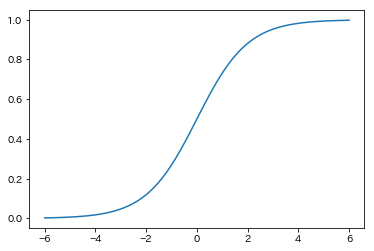

In [2]:
x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

ロジスティック分布は正規分布に似ているが、正規分布より計算しやすいのが特徴。

###### 練習問題

ロジスティック分布の確率密度関数のグラフを表示する。確率密度関数 $f'( x)$ は累積分布関数を $f( x)$ とすると、以下で表される。

$\displaystyle f'( x) =f( x) \times ( 1-f( x))$

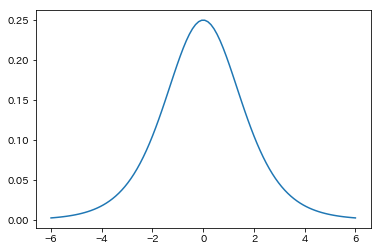

In [3]:
x = np.linspace(-6, 6, 100)
f = lambda x: 1 / (1 + np.exp(-x))
plt.plot(x, f(x) * (1 - f(x)))
plt.show()

### Pythonでのロジスティック回帰の実行
---
`sklearn.linear_model.LogisticRegression`を用いる。 scikit-learn の実装は厳密には上の説明と異なるが、引数 $C\rightarrow \infty $ で両者は一致する。

In [4]:
x, y = make_classification(
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=1234)
clf = pd.DataFrame(dict(x=x.ravel(), y=y))
print('clf')
display(clf)

clf


,x,y
0,-0.158174,0
1,-2.460149,0
...,...,...
98,-1.377130,0
99,-0.998298,0


In [5]:
LogisticRegression??

In [6]:
# 最初にインスタンスを作成
model = LogisticRegression()
# fitメソッドで分布関数を求める
# xはサイズが(サンプル数 × 変数の数)の行列でなければならない
x = clf['x'].values.reshape((-1, 1))
y = clf['y']
model.fit(x, y)
# 予測した確率はpredict_probaで得られる
# 予測結果は[クラス0の確率, クラス1の確率]の配列
print('予測結果')
print(model.predict_proba(x))
# クラス1の確率のみ得るには列を取り出す
print('クラス1の確率')
print(model.predict_proba(x)[:, 1])

予測結果
[[6.72882972e-01 3.27117028e-01]
 [9.99232139e-01 7.67860511e-04]
 [9.08356037e-02 9.09164396e-01]
 [2.36540823e-02 9.76345918e-01]
 [9.89154917e-01 1.08450832e-02]
 [9.71701262e-01 2.82987378e-02]
 [7.99953011e-02 9.20004699e-01]
 [8.09891126e-02 9.19010887e-01]
 [7.11238109e-02 9.28876189e-01]
 [4.18986599e-02 9.58101340e-01]
 [9.93940048e-01 6.05995164e-03]
 [9.99570273e-01 4.29727491e-04]
 [3.02102094e-02 9.69789791e-01]
 [1.89719497e-01 8.10280503e-01]
 [9.33668356e-01 6.63316435e-02]
 [1.36212955e-01 8.63787045e-01]
 [5.53429584e-02 9.44657042e-01]
 [9.70466176e-01 2.95338236e-02]
 [7.58536916e-03 9.92414631e-01]
 [8.97251114e-01 1.02748886e-01]
 [9.10535459e-01 8.94645415e-02]
 [1.57533559e-02 9.84246644e-01]
 [5.90200536e-02 9.40979946e-01]
 [7.78625996e-03 9.92213740e-01]
 [2.08456809e-01 7.91543191e-01]
 [9.89614686e-01 1.03853142e-02]
 [9.48259538e-01 5.17404620e-02]
 [9.54549505e-01 4.54504953e-02]
 [9.99515045e-01 4.84955433e-04]
 [6.99835450e-01 3.00164550e-01]
 [9.7

/root/local/python-3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###### 練習問題

clfデータセットの散布図とclfデータセットから学習したロジスティック回帰の予測曲線 (累積分布関数) を表示する。

/root/local/python-3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


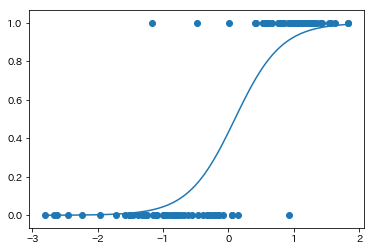

In [7]:
x = clf['x'].values.reshape((-1, 1))
y = clf['y']
model = LogisticRegression()
model.fit(x, y)
xx = np.linspace(x.min(), x.max(), 100).reshape((-1, 1))
plt.scatter(x, y)
plt.plot(xx, model.predict_proba(xx)[:, 1])
plt.show()